<a href="https://colab.research.google.com/github/fatalistix/smgmo/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Задание 1***

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [ ]:
# constants
rng = np.random.default_rng()
N = 500
EPS0 = 0.25

In [ ]:
# function first variant
A = rng.random() * 6 - 3
B = rng.random() * 6 - 3
C = rng.random() * 6 - 3
D = rng.random() * 6 - 3

def fPolynom(x_arg):
  return A * x_arg ** 3 + B * x_arg ** 2 + C * x_arg + D

In [ ]:
# function second variant
def fSinus(x_arg):
  return x_arg * math.sin(2 * math.pi * x_arg)

In [ ]:
def fNewSinus(x_arg):
  return 1 / x_arg * math.sin(1/x_arg)

In [ ]:
# generated argument sample
# x = rng.uniform(low=0.1 , high=1, size=N)
x = scipy.stats.truncnorm.rvs(a=-4, b=4, loc=0, scale=0.25, size=N)

In [ ]:
# first generated uniform error sample
epsUniform = rng.uniform(low=-EPS0, high=EPS0, size=N)

In [ ]:
# second generated normal error sample
EPS_NORMAL_LOC = 0
EPS_NORMAL_SCALE = 1

epsNormal = scipy.stats.truncnorm.rvs(a=-EPS0, b=EPS0, loc=EPS_NORMAL_LOC, scale=EPS_NORMAL_SCALE, size=N)

In [ ]:
# selected generated error sample
eps = epsNormal

In [ ]:
# selected function
f = fNewSinus

In [ ]:
# generated function values using selected function and generated sample
y = np.array([f(x[k]) + eps[k] for k in range(N)]) + eps

(-40.0, 40.0)

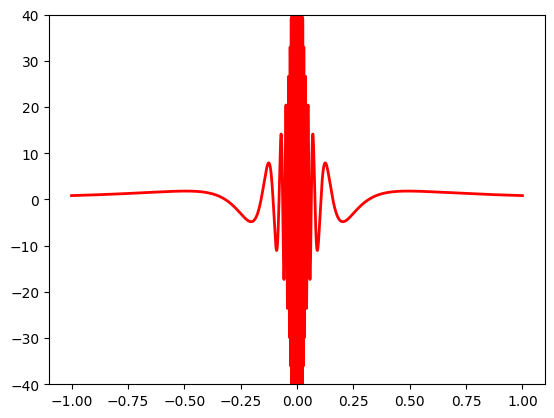

In [ ]:
# showing function's plot
x_linspace = np.linspace(start=-1, stop=1, num=10000)

plt.plot(x_linspace, [f(__x_l) for __x_l in x_linspace], linewidth=2, color='r')
plt.ylim([-40, 40])

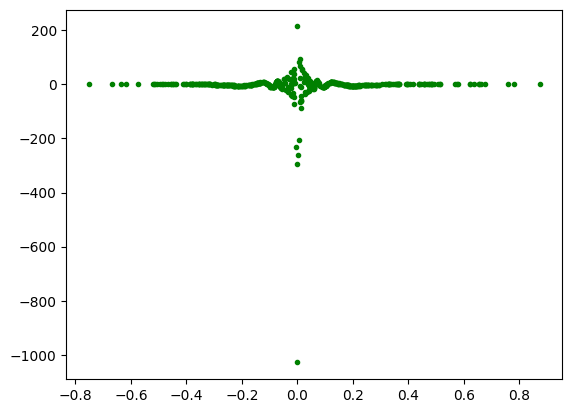

In [ ]:
# generated plot
plt.plot(x, y, 'g.')

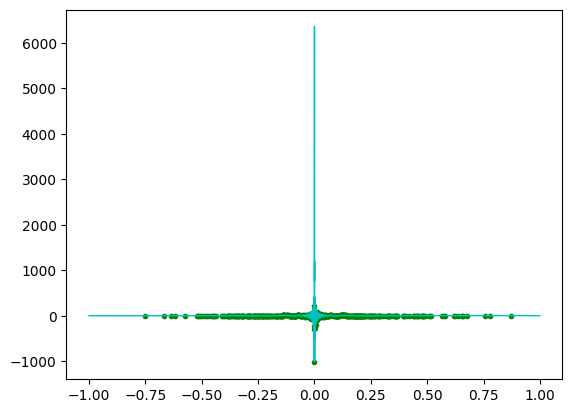

In [ ]:
# both plots
plt.plot(x, y, 'g.')
plt.plot(x_linspace, [f(__x_l) for __x_l in x_linspace], linewidth='1', color='c')
# plt.ylim([-2, 2])

***Задание 2***

In [ ]:
# constants
M = 40

In [ ]:
# makes matrix and vector
a_matrix = [[sum([x[k] ** (i + j) for k in range(N)]) for j in range(M+1)] for i in range(M+1)]
b_vector = [sum([(x[k] ** i) * y[k] for k in range(N)]) for i in range(M+1)]

In [ ]:
# makes w
w = np.linalg.solve(a_matrix, b_vector)

In [ ]:
def fWeighted(x_arg):
  return np.polyval(np.flip(w), x_arg)

(-100.0, 100.0)

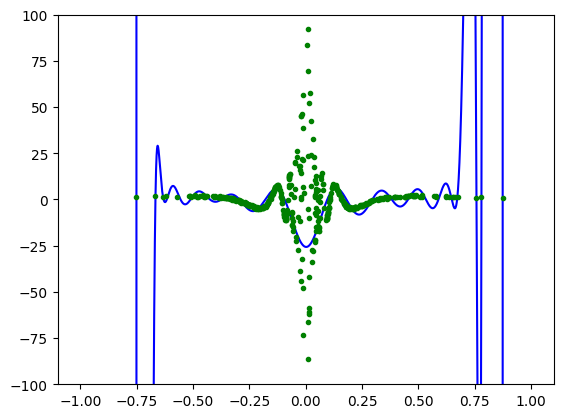

In [ ]:
plt.plot(x_linspace, fWeighted(x_linspace), 'b-')
plt.plot(x, y, 'g.')
plt.ylim([-100, 100])